### We'll learn Covid-19 prediction from symptoms using k-NN and Decision trees
***Covid-19 symptoms*** dataset from https://www.kaggle.com/hemanthhari/symptoms-and-covid-presence

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#setting seaborn plot style
sns.set_style('darkgrid')

In [ ]:
#loading dataset from csv
data =pd.read_csv('./CovidDataset.csv')
data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


# **Data preparation**

### Removing missing values if any

In [ ]:
#finding null/missing values for every column and it's percentage
numofmissingvals= data.isnull().sum()
percentofmissingvals = data.isnull().sum()*100/data.shape[0]

frame=pd.DataFrame({
    'Number of missing values' :numofmissingvals,
    'Percent of missing values %' :percentofmissingvals  
    })
frame

,Number of missing values,Percent of missing values %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


There aren't any missing values found, so dataset is already cleaned, but in case there were any, we could have used an imputer *(the one we talked about in kNN section)* to fill them out

### Tranforming to numerical classes

In [ ]:
#Using LabelEncoder to convert the categories in categorical features into numerical ones
#basically, for n different categories, category label would be from 0 to n  :)

from sklearn import preprocessing
enc=preprocessing.LabelEncoder()

for attr in data:  #for every feature
  enc.fit(data[str(attr)])  #first fitting (that is just getting unique categories)
  # print(enc.classes_)
  data[str(attr)]=enc.transform(data[str(attr)])  #then transforming 

data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


### Prominent Feature selection
The dataset has lot of symptoms, so we'll perform dimensionality reduction to grab only features that are really contributing in classification, coz most of them might even be interdependent

**plotting correlation using Pearson's correlation coefficient and then dropping irrelevant features**

*Note that we're only concerned with correlation of symptoms with 'Covid-19' column, not the entire matrix*

In [ ]:
correlationmatrix=data.corr()
correlationmatrix.style.background_gradient(cmap='YlOrRd',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [ ]:
#dropping features that have correlation-with-Covid-19 less than 0.1
for attr in correlationmatrix:
  if correlationmatrix['COVID-19'][attr]<0.1 :
    print(attr)
    data=data.drop(attr,axis=1)
data

Running Nose
Asthma
Chronic Lung Disease
Headache
Heart Disease
Diabetes
Fatigue 
Gastrointestinal 


,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,0,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,0,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,0,0,0,0,0,0,0,1
5431,1,1,1,0,1,0,0,0,0,0,0,0,0
5432,1,1,1,0,0,0,0,0,0,0,0,0,0


#**Training Model using K-Nearest Neighbours**

In [ ]:
#importing knn classifier class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#creating data and labels from dataset
labels=data['COVID-19']
dataset=data.drop('COVID-19',axis=1)

#splitting data and labels into training and testing
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.20)

accuracy for k=15  96.78012879484821


Text(0, 0.5, 'Error Rate')

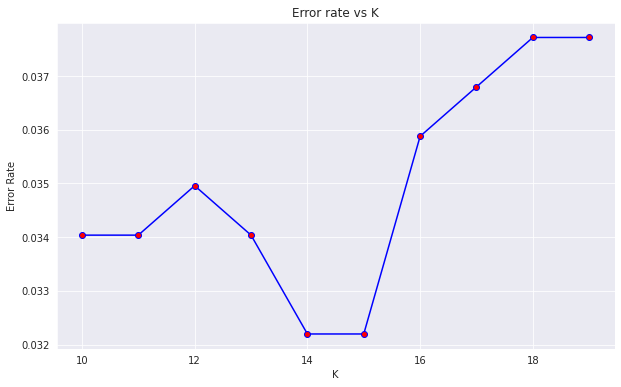

In [ ]:
#crossvalidating over a range of k

error_rate = []
for k in range(10,20):
  #creating classifier object by providing k as parameter
  knn = KNeighborsClassifier(n_neighbors=k)

  #fitting the model
  knn.fit(x_train,y_train)

  #predicting classes on testing set
  pred_i = knn.predict(x_test)
  #calculating error rate
  error_rate.append(np.mean(pred_i != y_test))
  
  #after speculating error vs k curve, k=14 and k=15 had least error, so finding accuracy for k=15
  if(k==15):
    print("accuracy for k=15 ",knn.score(x_test, y_test)*100)

#plotting Error vs k curve, to find elbow and speculate it to find k having least error
plt.figure(figsize=(10,6))
plt.plot(range(10,20),error_rate,color='blue', marker='o', markerfacecolor='red')
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')



##**Training Model using Decision Trees**

In [ ]:
from sklearn.model_selection import train_test_split

labels=data['COVID-19']
dataset=data.drop('COVID-19',axis=1)

x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.20)

from sklearn import tree

#creating Decidion tree classifier object, the default impurity index is Gini Impurity index...if u want to work with entropy, then u need to
#explicitly pass criterion="entropy" as parameter
Dtree = tree.DecisionTreeClassifier()
#fitting the model
Dtree.fit(x_train,y_train)
#predicting classes
y_pred = Dtree.predict(x_test)


In [ ]:
#creating a testcase and predicting
case={'Breathing Problem':[0],	'Fever':[1],	'Dry Cough':[1]	,'Sore throat':[0],	'Hyper Tension':[0],	'Abroad travel':[0],
      'Contact with COVID Patient':[1],
	'Attended Large Gathering':[1],	'Visited Public Exposed Places':[0],
      'Family working in Public Exposed Places':[0],	'Wearing Masks':[1]	,'Sanitization from Market':[1]}
testcase=pd.DataFrame(case)
print(Dtree.predict(testcase))
#output is 1 i.e. Covid-19 is detected

[1]


##**Calculating Accuracy**

In [ ]:
accuracy=Dtree.score(x_test, y_test)*100
accuracy

97.79208831646734

#**Accuracy** : 97.79208831646734

### Plotting Decision tree

[Text(0.4107142857142857, 0.9545454545454546, 'X[3] <= 0.5\ngini = 0.313\nsamples = 4347\nvalue = [844, 3503]'),
 Text(0.17142857142857143, 0.8636363636363636, 'X[5] <= 0.5\ngini = 0.499\nsamples = 1199\nvalue = [622, 577]'),
 Text(0.14285714285714285, 0.7727272727272727, 'X[0] <= 0.5\ngini = 0.403\nsamples = 863\nvalue = [622, 241]'),
 Text(0.05714285714285714, 0.6818181818181818, 'X[7] <= 0.5\ngini = 0.128\nsamples = 553\nvalue = [515, 38]'),
 Text(0.02857142857142857, 0.5909090909090909, 'gini = 0.0\nsamples = 462\nvalue = [462, 0]'),
 Text(0.08571428571428572, 0.5909090909090909, 'X[2] <= 0.5\ngini = 0.486\nsamples = 91\nvalue = [53, 38]'),
 Text(0.05714285714285714, 0.5, 'X[6] <= 0.5\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(0.02857142857142857, 0.4090909090909091, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.08571428571428572, 0.4090909090909091, 'X[4] <= 0.5\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.05714285714285714, 0.3181818181818182, 'X[9] <=

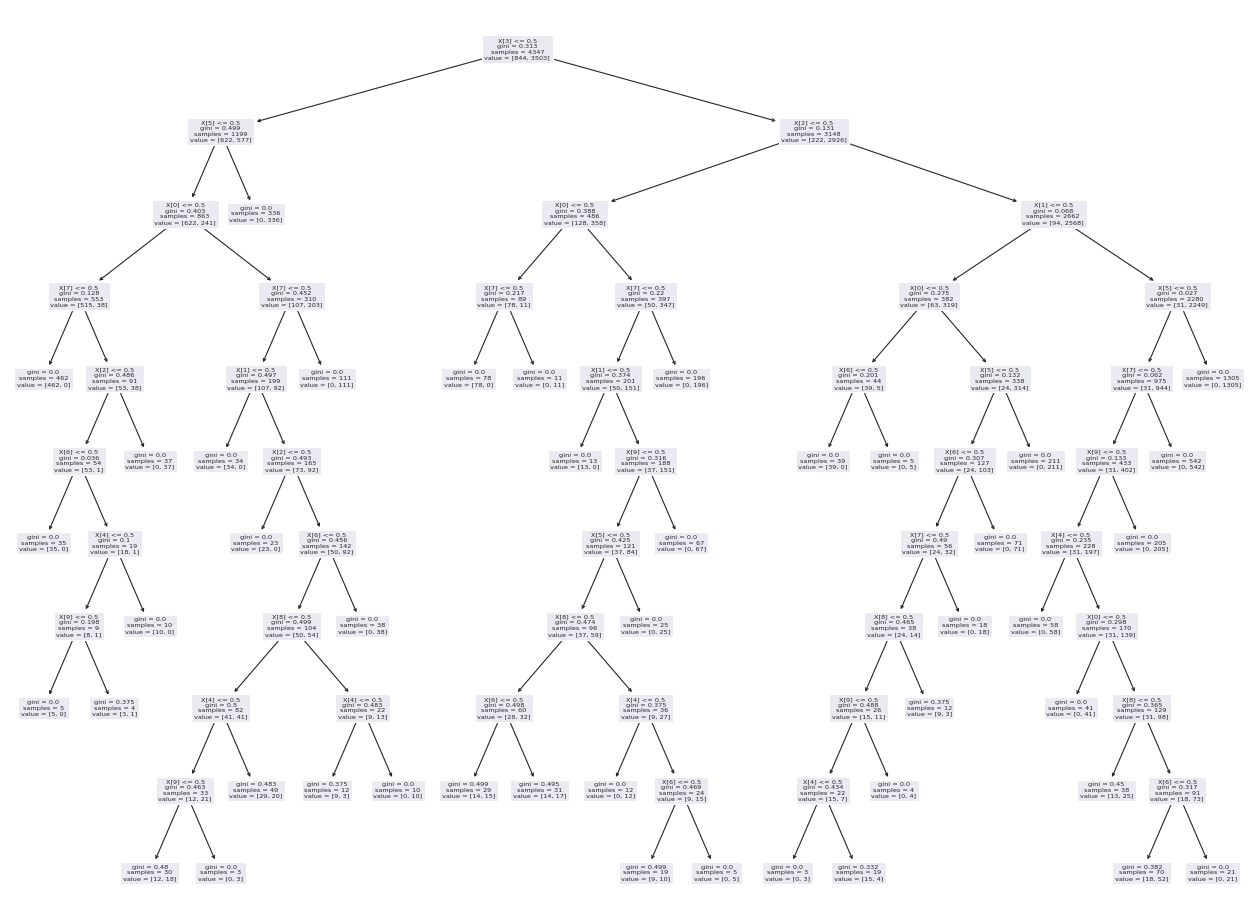

In [ ]:
plt.figure(figsize=(20, 15))
tree.plot_tree(Dtree)